# Loan Status Prediction

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [38]:
new_columns=['ID','Gender','Married','Dependents','Education','Self Employed','Applicant Income','Coapplicant Income',
             'Loan Amount','Loan Amount Term','Credit History','Property Area','Loan Status']

In [39]:
df=pd.read_csv('loan.csv',names=new_columns)
df

,ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self Employed       582 non-null    object 
 6   Applicant Income    614 non-null    int64  
 7   Coapplicant Income  614 non-null    float64
 8   Loan Amount         592 non-null    float64
 9   Loan Amount Term    600 non-null    float64
 10  Credit History      564 non-null    float64
 11  Property Area       614 non-null    object 
 12  Loan Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
df.isnull().sum()

ID                     0
Gender                13
Married                3
Dependents            15
Education              0
Self Employed         32
Applicant Income       0
Coapplicant Income     0
Loan Amount           22
Loan Amount Term      14
Credit History        50
Property Area          0
Loan Status            0
dtype: int64

In [42]:
# There are some columns with null values in dataset.
# Some columns are having int datatype and some are categorical.

In [43]:
# Dropping ID as it has no impact on prediction.
df.drop(['ID'],axis=1,inplace=True)

In [44]:
# Filling categorical missing values with their corresponding columns modes.
Nan_list=['Gender','Married','Dependents','Self Employed','Credit History','Loan Amount Term']
for i in Nan_list:
    df[i]=df[i].fillna(df[i].mode()[0])

In [45]:
# Filling missing values of column having continuous values.
df['Loan Amount']=df['Loan Amount'].fillna(df['Loan Amount'].median())

In [46]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self Employed         0
Applicant Income      0
Coapplicant Income    0
Loan Amount           0
Loan Amount Term      0
Credit History        0
Property Area         0
Loan Status           0
dtype: int64

In [47]:
# Encoding

In [48]:
Encoding=['Gender','Married','Dependents','Education','Self Employed','Property Area','Loan Status']
lb=LabelEncoder()
for i in Encoding:
    df[i]=lb.fit_transform(df[i])

In [49]:
df

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [50]:
df.describe()

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [51]:
# Statistical summary shows some outliers in 'Loan Amount','Loan Amount Term','Coapplicant Income' and 'Applicant Income'.

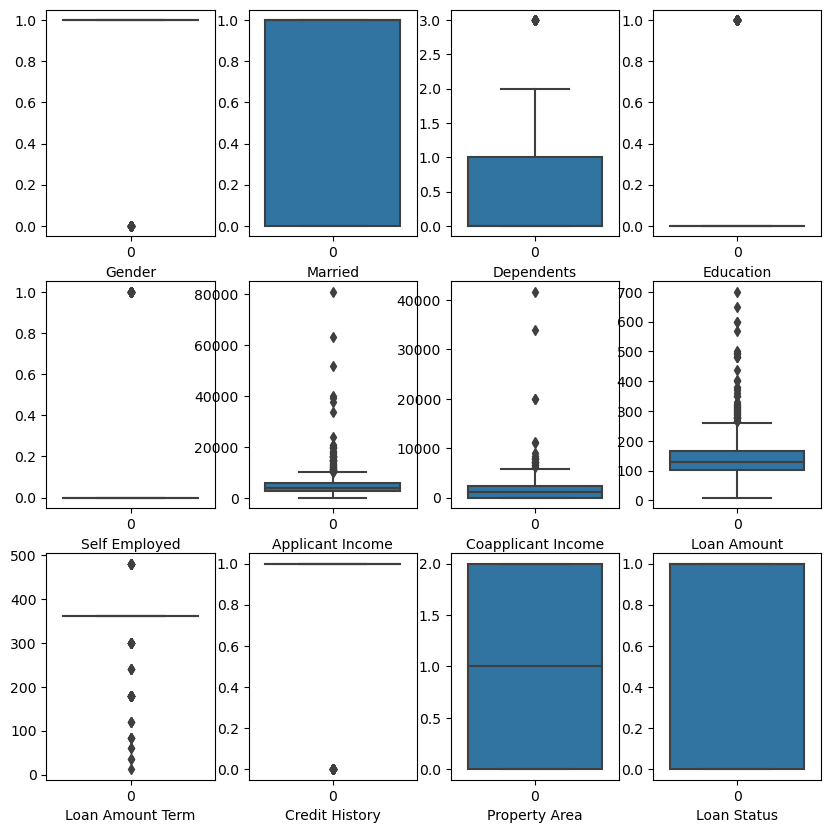

In [52]:
plt.figure(figsize=(10,10))
plot=1
for column in df.columns:
    if plot<=12:
        plt.subplot(3,4,plot)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plot+=1    
plt.show()    

# visualisation

<Axes: xlabel='Gender', ylabel='count'>

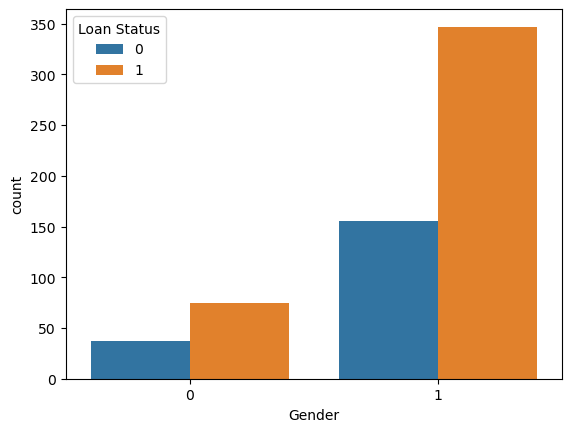

In [53]:
sns.countplot(x=df['Gender'],hue=df['Loan Status'])

In [54]:
pd.crosstab([df['Gender'],df['Married']],[df['Loan Status']])

Loan Status       0    1
Gender Married          
0      0         29   51
       1          8   24
1      0         50   83
       1        105  264

<Axes: xlabel='Married', ylabel='count'>

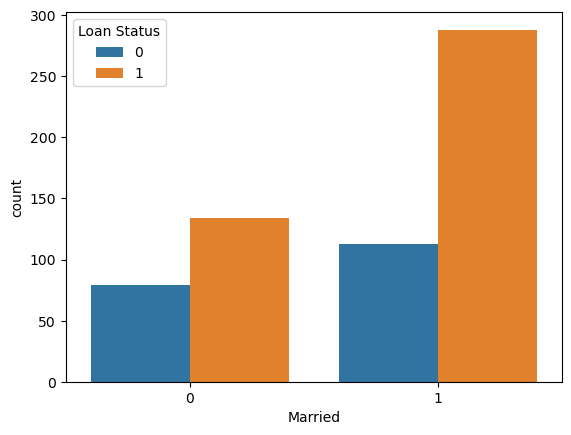

In [55]:
sns.countplot(x=df['Married'],hue=df['Loan Status'])

<Axes: xlabel='Dependents', ylabel='count'>

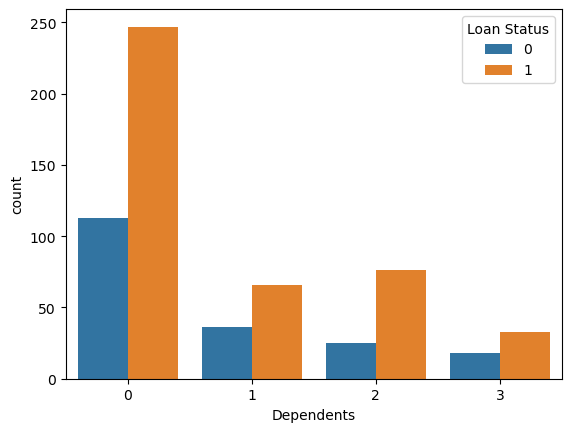

In [56]:
sns.countplot(x=df['Dependents'],hue=df['Loan Status'])

<Axes: xlabel='Education', ylabel='count'>

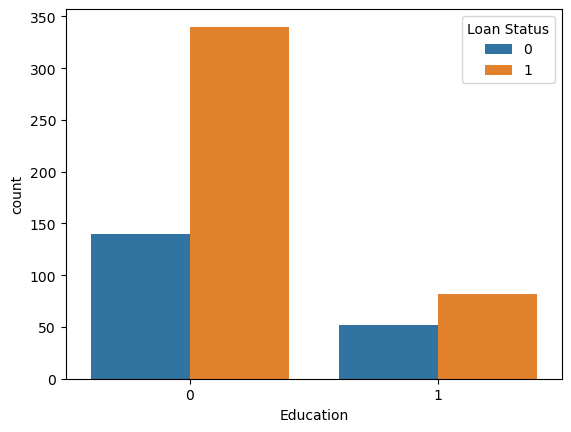

In [57]:
sns.countplot(x=df['Education'],hue=df['Loan Status'])

<Axes: xlabel='Self Employed', ylabel='count'>

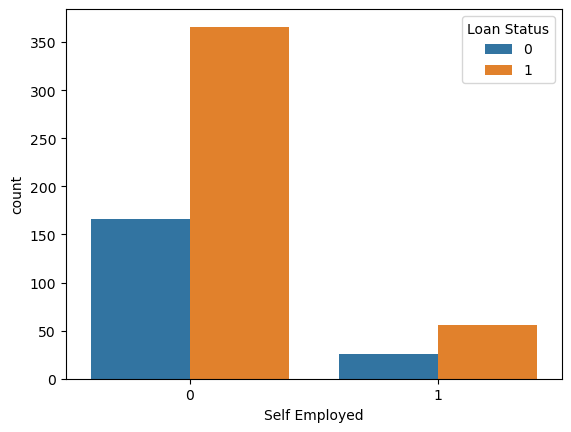

In [58]:
sns.countplot(x=df['Self Employed'],hue=df['Loan Status'])

<Axes: xlabel='Loan Status', ylabel='Applicant Income'>

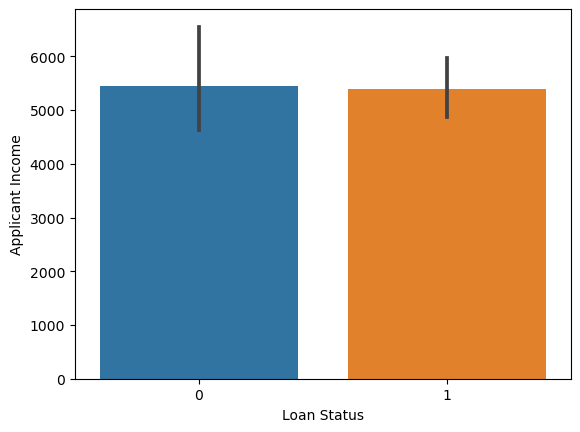

In [59]:
sns.barplot(y=df['Applicant Income'],x=df['Loan Status'])

<Axes: xlabel='Loan Status', ylabel='Loan Amount'>

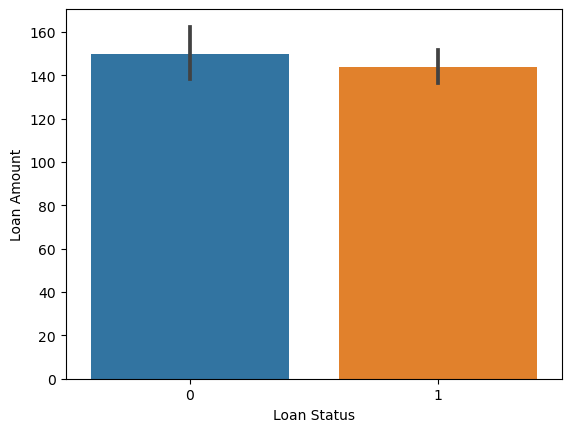

In [60]:
sns.barplot(y=df['Loan Amount'],x=df['Loan Status'])

In [61]:
# Numbers of males is much higher than females for applying a loan but getting approvel is not based on gender as almost 
# both are having same chances to get a loan.
# Married people have more possibility of getting loan approval.
# Maximum loan approvel comes with 0 dependents.
# People who are employed somewhere are likely to apply for a loan but self employement is not a factor to get a loan 
# approval.
# Graduate people are more likely to get loan approval.

In [62]:
# Removing outliers
z=np.abs(zscore(df))

In [63]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [64]:
DF=df[(z<3).all(axis=1)]

In [65]:
df=DF.copy()

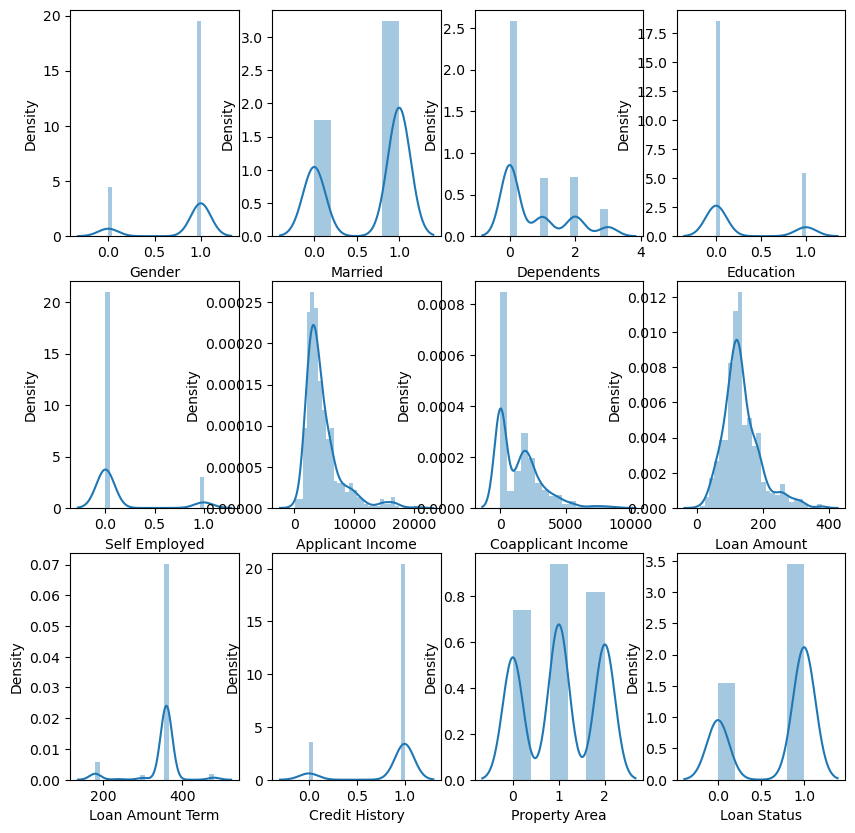

In [66]:
# Checking skewness
plt.figure(figsize=(10,10))
plot=1

for column in df.columns:
    if plot<=12:
        plt.subplot(3,4,plot)
        sns.distplot(df[column])
        plt.xlabel(column)
    plot+=1
plt.show()

In [67]:
df.skew()

Gender               -1.622920
Married              -0.630211
Dependents            1.052106
Education             1.306588
Self Employed         2.252848
Applicant Income      2.148522
Coapplicant Income    1.350517
Loan Amount           1.151525
Loan Amount Term     -2.098806
Credit History       -1.976043
Property Area        -0.055332
Loan Status          -0.822635
dtype: float64

<Axes: >

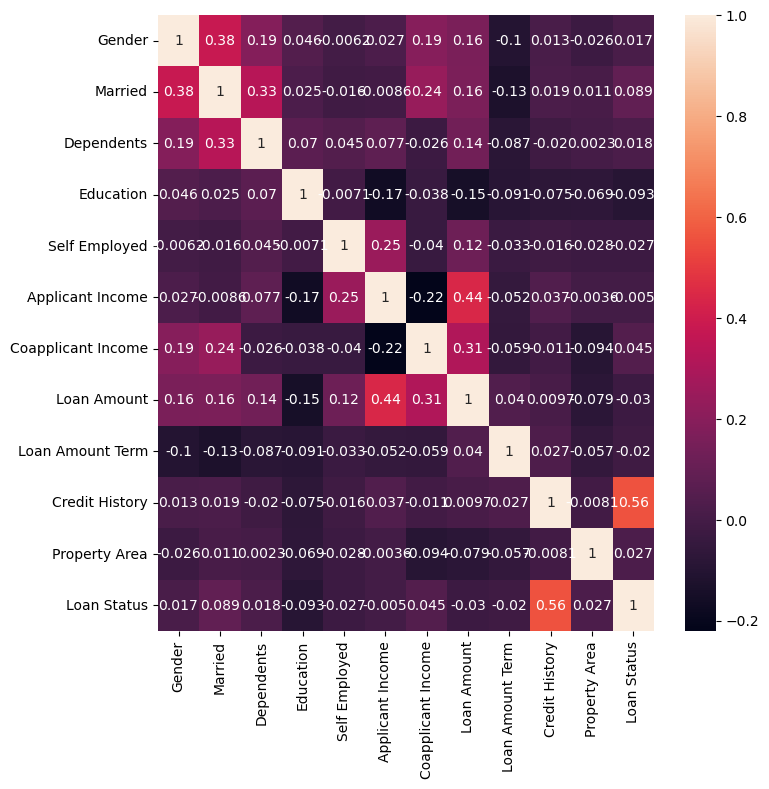

In [68]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [69]:
# seems there is ot much multicolinearity there accept credit history is having positive correlation with target variable.

In [70]:
x = df.drop(['Loan Status'], axis =1)
y = df['Loan Status']

In [71]:
# checking imbalancing
y.value_counts()

1    398
0    179
Name: Loan Status, dtype: int64

In [72]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [73]:
y.value_counts()

1    398
0    398
Name: Loan Status, dtype: int64

In [74]:
# scaling the data
st=StandardScaler()
dfx=st.fit_transform(x)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [78]:
# checking best random state
max_accu=0
max_rand=0
for i in range(1,100):
    xtrain,xtest,ytrain,ytest = train_test_split(dfx,y,test_size = 0.2, random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    ypred=lg.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    if acc>max_accu:
        max_accu=acc
        max_rand=i
print(max_accu)
print(max_rand)

0.85
68


In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(dfx,y,test_size = 0.2, random_state=68)
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
pred=lg.predict(xtest)
print(accuracy_score(ytest, pred))
print('\n')
print(confusion_matrix(ytest, pred))
print('\n')
print(classification_report(ytest, pred))

0.85


[[49 16]
 [ 8 87]]


              precision    recall  f1-score   support

           0       0.86      0.75      0.80        65
           1       0.84      0.92      0.88        95

    accuracy                           0.85       160
   macro avg       0.85      0.83      0.84       160
weighted avg       0.85      0.85      0.85       160



In [80]:
# preparing other models
model=[ SVC(),GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(),RandomForestClassifier()]
        
for m in model:
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    print(m)
    print(accuracy_score(ytest, pred))
    print('\n')
    print(confusion_matrix(ytest, ypred))
    print('\n')
    print(classification_report(ytest, pred))

SVC()
0.8375


[[29 36]
 [29 66]]


              precision    recall  f1-score   support

           0       0.83      0.75      0.79        65
           1       0.84      0.89      0.87        95

    accuracy                           0.84       160
   macro avg       0.84      0.82      0.83       160
weighted avg       0.84      0.84      0.84       160

GaussianNB()
0.8125


[[29 36]
 [29 66]]


              precision    recall  f1-score   support

           0       0.84      0.66      0.74        65
           1       0.80      0.92      0.85        95

    accuracy                           0.81       160
   macro avg       0.82      0.79      0.80       160
weighted avg       0.82      0.81      0.81       160

DecisionTreeClassifier()
0.81875


[[29 36]
 [29 66]]


              precision    recall  f1-score   support

           0       0.76      0.80      0.78        65
           1       0.86      0.83      0.84        95

    accuracy                           0.82    

In [81]:
# Random forest have higher accuracy

In [82]:
# Hyperparameter tuning

In [83]:
parameter = {'max_depth': [5, 10,20,40,50,],'criterion':['gini','entropy'],'n_estimators': [5, 10, 15 ,25,50]}

In [84]:
GCV = GridSearchCV(RandomForestClassifier(),parameter)
GCV.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50],
                         'n_estimators': [5, 10, 15, 25, 50]})

In [96]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}

In [97]:
# final model

In [101]:
Final_model = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=10)
Final_model.fit(xtrain,ytrain)
y_pred=Final_model.predict(xtest)
print( accuracy_score(ytest, y_pred))

0.8875


In [102]:
import joblib
joblib.dump(Final_model,'Loan_Status.obj')

['Loan_Status.obj']